***ANALYSIS FILE***
<p>This file is to analyse data from the covid finaancial sector responses</p>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


<h5>Read file</h5>

In [2]:
background_data=pd.read_csv("nics-firearm-background-checks.csv")
background_data
sns.set()

<h5>Clean file</h5>

<p>Originally with 14,000 rows I dropped  states with Nan Values which reduced the number to 3000 rows. For the study I thus use data from the 3000 rows as this is sensitive information which can be conequential if incomplete data is used</p>

In [3]:
background_data.dropna(inplace=True)
background_data

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2021-02,Alabama,31803.0,512.0,20970.0,16026.0,1548.0,959,0.0,18.0,...,0.0,0.0,0.0,35.0,27.0,6.0,2.0,5.0,0.0,74710
1,2021-02,Alaska,222.0,1.0,3055.0,2564.0,375.0,189,0.0,3.0,...,0.0,0.0,0.0,7.0,3.0,0.0,0.0,0.0,0.0,6667
2,2021-02,Arizona,9290.0,1159.0,20530.0,9991.0,1754.0,1114,0.0,10.0,...,1.0,0.0,0.0,19.0,15.0,2.0,0.0,0.0,0.0,45496
3,2021-02,Arkansas,3123.0,1152.0,7068.0,5289.0,448.0,390,8.0,7.0,...,0.0,0.0,0.0,12.0,6.0,0.0,0.0,0.0,0.0,18916
4,2021-02,California,16025.0,11953.0,40789.0,27915.0,6499.0,0,0.0,2.0,...,71.0,0.0,0.0,9126.0,3416.0,709.0,60.0,18.0,0.0,119784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,2016-08,Virginia,776.0,0.0,21108.0,15802.0,978.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38667
3021,2016-08,Washington,14063.0,33.0,15083.0,11376.0,1622.0,606,8.0,6.0,...,8.0,0.0,0.0,503.0,444.0,23.0,11.0,4.0,1.0,46645
3022,2016-08,West Virginia,1948.0,0.0,6916.0,5283.0,243.0,345,14.0,9.0,...,1.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,17315
3023,2016-08,Wisconsin,25551.0,0.0,14764.0,12079.0,709.0,43,0.0,0.0,...,4.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,53689


***ANALYSIS OF STATES WITH THE LEAST GUN PERMITS,STATES WITH THE MOST AND LEAST WEAPONS***

<p>Analysis of the data from the set</p></br>
<p><strong>1. </strong>Determining which is the most available gun type within the following states and which state has the most and least weapons</p>

In [4]:
max_handguns=int(background_data["handgun"].mean())
max_longgun=int(background_data["long_gun"].mean())
max_other=int(background_data["other"].mean())

# getting the state with the most weapons
max_totals=background_data["totals"].max()
max_state=background_data.loc[background_data['totals'] == max_totals]

max_state
print("The State with the most weapons is "+str(max_state["state"])+"\n")
print ("There are "+str(max_handguns)+" Handguns\n"+str(max_longgun)+" Long guns\n"+"and "+str(max_other)+" Other types of guns")

The State with the most weapons is 69    Illinois
Name: state, dtype: object

There are 12483 Handguns
8688 Long guns
and 911 Other types of guns


***STATE WITH THE MOST GUNS***
<strong><h6>Illinois is the state with the most guns with <strong>35848 handguns and 17817 long guns</strong></h6><br>
***ON AVERAGE***
    <p>On average there are also generally more handguns with 12483 handguns 8688 long guns and 911 other types of weapons<p></strong>

<ipython-input-5-a45739e7ede7>:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(Names,Total,color=my_colours)


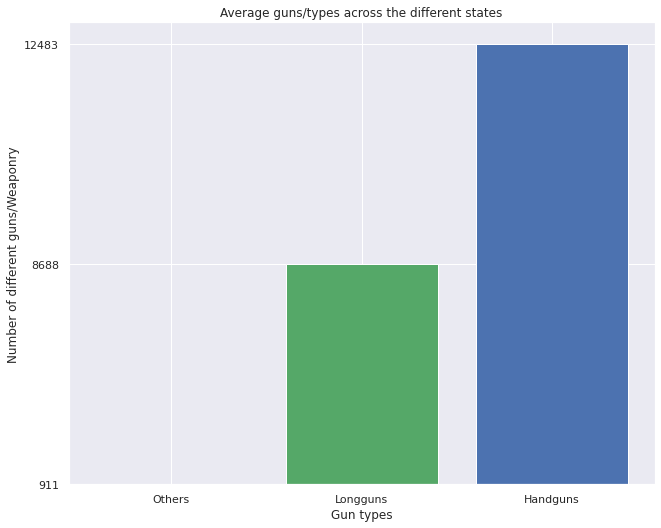

In [5]:
my_colours="rgb"
Total=["911","8688","12483"]
Names=["Others","Longguns","Handguns"]
plt.bar(Names,Total,color=my_colours)
fig=plt.gcf()
plt.ylabel("Number of different guns/Weaponry")
plt.xlabel("Gun types")
plt.title("Average guns/types across the different states")
fig.set_size_inches(10.5, 8.5)
fig.savefig('Gunrate_comparison.png', dpi=100)

<h5>ANALYSIS 2</h5><p><strong>2. </strong>Finding the state with the most permits and the least permits to find their trends over the years in comparison to the amount of guns available</p>

In [6]:
max_Value=background_data["permit"].max()
min_Value=background_data["permit"].min()

# State with the most handguns but the least permits
least_permitStates=background_data.loc[background_data['permit'] == min_Value]
Max_hg=least_permitStates["totals"].max()
Max_hg_state=least_permitStates.loc[least_permitStates['totals'] == Max_hg]
Max_hg_state
# most_permitStates=background_data.loc[background_data['permit'] == max_Value]


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
2788,2016-12,Oklahoma,0.0,0.0,17990.0,19418.0,1126.0,1060,0.0,15.0,...,0.0,0.0,0.0,34.0,30.0,6.0,2.0,0.0,2.0,43082


In [7]:
# State with the most handguns AND the most permits
most_permitStates=background_data.loc[background_data['permit'] == max_Value]
Max_hg_2=most_permitStates["totals"].max()
Max_hg_state_2=most_permitStates.loc[most_permitStates['totals'] == Max_hg_2]
Max_hg_state_2
# most_permitStates=background_data.loc[background_data['permit'] == max_Value]


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
1778,2018-06,Kentucky,395679.0,0.0,7130.0,4686.0,304.0,523,0.0,22.0,...,0.0,0.0,0.0,26.0,25.0,2.0,1.0,0.0,0.0,411606


***State with the most permits and most guns***

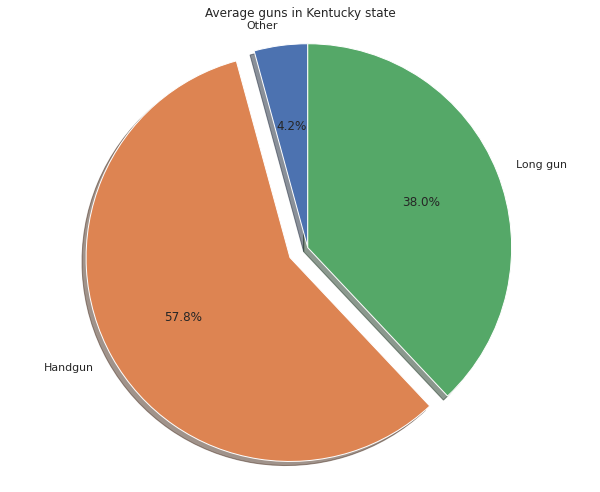

In [8]:
# plt.bar(["Other","Handgun","Long gun"],["1126","17990","19418"],color=my_colours)

labels="Other","Handgun","Long gun"
total=523+7130+4686
sizes=[str(52300/total),str(713000/total),str(468600/total)]
explode = (0, 0.1, 0) 


fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


fig=plt.gcf()
# plt.ylabel("Number of different guns/Weaponry")
# plt.xlabel("Gun types")
plt.title("Average guns in Kentucky state")
fig.set_size_inches(10.5, 8.5)
fig.savefig('Gunrate_Kentucky.png', dpi=100)

***State with the least permits and most guns***

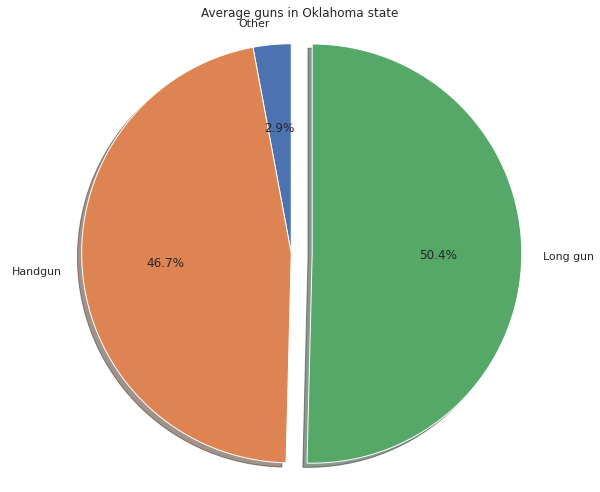

In [9]:
# plt.bar(["Other","Handgun","Long gun"],["1126","17990","19418"],color=my_colours)

labels="Other","Handgun","Long gun"
total=1126+17990+19418
sizes=[str(112600/total),str(1799000/total),str(1941800/total)]
explode = (0, 0, 0.1) 


fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


fig=plt.gcf()
# plt.ylabel("Number of different guns/Weaponry")
# plt.xlabel("Gun types")
plt.title("Average guns in Oklahoma state")
fig.set_size_inches(10.5, 8.5)
fig.savefig('Gunrate_Oklahoma.png', dpi=100)

<p>From the analysis Oklahoma has zero permits but the most guns recorded in oublic arms registering the most long guns, Handguns and other types amongst states that have no permits </p></br><p>Most of the guns Oklahoma state are illegally owned and the bulk long guns which include semi automatic assault rifles and bolt action rifles </p></br><p>This shows the weak state reinforcment on current state laws of gun registration, with a large ammount of illegal gun owners</p>

***ANALYSIS OF GUN PERMIT REGISTRATION IN KENTUCKY THE STATE WITH THE MOST PERMITS***

In [10]:
# To check how much permits have been registered over the years in kentucky to find the pattern
permits=background_data.loc[background_data['state'] == "Kentucky"]
permits2=permits.sort_values(by=['month'])
permits2

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
2988,2016-08,Kentucky,9579.0,0.0,8842.0,7187.0,281.0,445,0.0,5.0,...,0.0,0.0,0.0,2.0,3.0,0.0,0.0,1.0,0.0,29746
2933,2016-09,Kentucky,276744.0,0.0,8917.0,8172.0,257.0,590,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,298753
2878,2016-10,Kentucky,354387.0,0.0,10111.0,10030.0,354.0,519,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,378973
2823,2016-11,Kentucky,297507.0,0.0,12847.0,14844.0,329.0,640,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,330444
2768,2016-12,Kentucky,358510.0,0.0,17311.0,16766.0,371.0,673,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,397059
2713,2017-01,Kentucky,325954.0,0.0,9743.0,6700.0,292.0,397,0.0,8.0,...,0.0,0.0,0.0,8.0,3.0,0.0,0.0,0.0,0.0,345924
2658,2017-02,Kentucky,283492.0,0.0,14975.0,8636.0,253.0,1044,0.0,15.0,...,0.0,0.0,0.0,28.0,17.0,0.0,0.0,0.0,3.0,313748
2603,2017-03,Kentucky,370113.0,0.0,13769.0,8992.0,347.0,645,0.0,7.0,...,0.0,0.0,0.0,27.0,33.0,0.0,1.0,1.0,1.0,397959
2548,2017-04,Kentucky,372852.0,0.0,9858.0,6519.0,257.0,433,0.0,8.0,...,0.0,0.0,0.0,20.0,21.0,0.0,0.0,0.0,0.0,392685
2493,2017-05,Kentucky,374078.0,0.0,8690.0,5378.0,223.0,433,0.0,5.0,...,0.0,0.0,0.0,17.0,9.0,1.0,1.0,2.0,0.0,391740


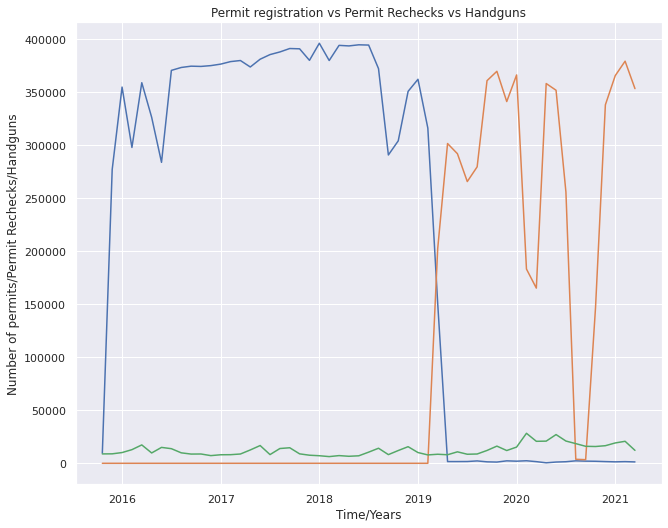

In [19]:
# permits2[['permit','permit_recheck']].plot(kind="line")
plt.plot(permits2["month"],permits2[["permit","permit_recheck","handgun"]])
labels=["2016","2017","2018","2019","2020","2021"]
x=[2,12,22,32,42,52]
# plt.xticks(x, labels)
# plt.margins(0.2) 
fig=plt.gcf()
plt.title("Permit registration vs Permit Rechecks vs Handguns")
fig.set_size_inches(10.5, 8.5)
plt.xticks(x,labels,rotation='horizontal')
# plt.subplots_adjust(bottom = 0.3) 
plt.ylabel("Number of permits/Permit Rechecks/Handguns")
plt.xlabel("Time/Years")
fig.savefig('Permit_comparison.png', dpi=100)

***Analysis***
It is evident that from 2016 to 2018 no permit rechecks were occuring while as in the same period there was a high number of permit applicatios when permit rechecks started occuring post 2018 the permit applications dropped eventually almost to zero